In [1]:
#Introduccion
-Objetivo:
    -Generar datos sintéticos para equilibrar el dataset EMG auditado, siguiendo los umbrales diagnósticos para Guillain-Barré establecidos en el informe clínico.
    -Se busca que el dataset final contenga:

SyntaxError: invalid syntax (4243975186.py, line 2)

In [2]:
import pandas as pd
import numpy as np

# Cargar dataset original
df_original = pd.read_csv('emg_normalized_labeled_score.csv')

# Asegurar que is_synthetic exista (en caso de que falte)
if 'is_synthetic' not in df_original.columns:
    df_original['is_synthetic'] = 0

# Columnas EMG (excluyendo info no fisiológica)
cols_emg = df_original.columns.drop(['label', 'gesture', 'gb_score', 'is_synthetic'])

def generar_sinteticos_realistas(df_real, score, cantidad, ruido_std=0.02):
    """
    Genera datos sintéticos realistas para un score específico usando bootstrap + ruido.

    Parámetros:
    - df_real: DataFrame original con datos reales
    - score: score gb_score (0, 1, 2, 3)
    - cantidad: muestras a generar
    - ruido_std: desviación estándar del ruido (default 0.02)

    Retorna:
    - DataFrame con datos sintéticos
    """
    df_filtrado = df_real[df_real['gb_score'] == score]
    if df_filtrado.empty:
        raise ValueError(f"No hay datos reales con score {score} para generar muestras.")
    
    # Bootstrap + ruido
    muestras = df_filtrado.sample(n=cantidad, replace=True).reset_index(drop=True)
    ruido = np.random.normal(loc=0, scale=ruido_std, size=muestras[cols_emg].shape)
    datos_sinteticos = muestras[cols_emg] + ruido
    
    # Clip para mantener en rango [0, 1]
    datos_sinteticos = datos_sinteticos.clip(0, 1)

    # Reconstruir el DataFrame final
    datos_sinteticos['gb_score'] = score
    datos_sinteticos['label'] = 0
    datos_sinteticos['gesture'] = 'synthetic'
    datos_sinteticos['is_synthetic'] = 1

    return datos_sinteticos


In [3]:
# Generar 5000 muestras sintéticas para cada score
sint_0 = generar_sinteticos_realistas(df_original[df_original['is_synthetic'] == 0], score=0, cantidad=5000)
sint_1 = generar_sinteticos_realistas(df_original[df_original['is_synthetic'] == 0], score=1, cantidad=5000)
sint_2 = generar_sinteticos_realistas(df_original[df_original['is_synthetic'] == 0], score=2, cantidad=5000)
sint_3 = generar_sinteticos_realistas(df_original[df_original['is_synthetic'] == 0], score=3, cantidad=5000)

# Concatenar con datos reales
df_final = pd.concat([df_original, sint_0, sint_1, sint_2, sint_3], ignore_index=True)
df_final.to_csv('emg_balanceado_sintetico_realista.csv', index=False)


In [4]:
min_count = 5130
df_balanceado = pd.concat([
    df_final[df_final['gb_score'] == 0].sample(n=min_count, random_state=42),
    df_final[df_final['gb_score'] == 1].sample(n=min_count, random_state=42),
    df_final[df_final['gb_score'] == 2].sample(n=min_count, random_state=42),
    df_final[df_final['gb_score'] == 3].sample(n=min_count, random_state=42)
], ignore_index=True)

df_balanceado.to_csv('emg_balanceado_uniforme.csv', index=False)


gb_score
0    5130
1    5130
2    5130
3    5130
Name: count, dtype: int64


/tmp/ipykernel_22183/3646068646.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_final.index, y=conteo_final.values, palette='viridis')


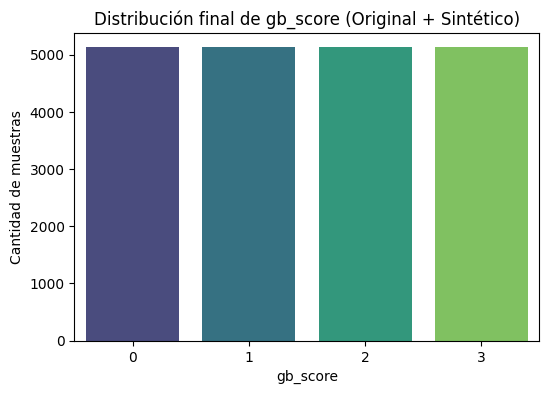

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de gb_score final
df_balanceado = pd.read_csv("emg_balanceado_uniforme.csv", keep_default_na=False)
conteo_final = df_balanceado['gb_score'].value_counts().sort_index()

# Mostrar conteo
print(conteo_final)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_final.index, y=conteo_final.values, palette='viridis')
plt.xlabel('gb_score')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución final de gb_score (Original + Sintético)')
plt.show()


In [6]:
new = pd.read_csv("emg_balanceado_sintetico_realista.csv", keep_default_na=False)
new.head()

,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gesture,gb_score,is_synthetic
0,0.095171,0.045793,0.039167,0.056886,0.025942,0.022525,0.020427,0.020765,0.085093,0.038707,...,0.142857,0.153846,0.000000,0.000000,0.071429,0.071429,1,index_finger,3,0
1,0.124557,0.063950,0.136178,0.052121,0.045584,0.041957,0.034496,0.033183,0.114915,0.055589,...,0.285714,0.000000,0.090909,0.142857,0.071429,0.142857,1,index_finger,3,0
2,0.087322,0.058739,0.055908,0.057614,0.043614,0.047082,0.039193,0.032423,0.077393,0.050708,...,0.071429,0.000000,0.000000,0.142857,0.142857,0.071429,1,index_finger,3,0
3,0.085425,0.055204,0.061297,0.129018,0.035555,0.034858,0.021106,0.022684,0.074900,0.047179,...,0.428571,0.307692,0.000000,0.071429,0.000000,0.000000,1,index_finger,3,0
4,0.092773,0.054181,0.044757,0.079551,0.037965,0.037268,0.035124,0.029859,0.083379,0.046036,...,0.071429,0.153846,0.000000,0.142857,0.142857,0.142857,1,index_finger,3,0


In [20]:
new.columns

Index(['standard_deviation_e1', 'standard_deviation_e2',
       'standard_deviation_e3', 'standard_deviation_e4',
       'standard_deviation_e5', 'standard_deviation_e6',
       'standard_deviation_e7', 'standard_deviation_e8', 'root_mean_square_e1',
       'root_mean_square_e2', 'root_mean_square_e3', 'root_mean_square_e4',
       'root_mean_square_e5', 'root_mean_square_e6', 'root_mean_square_e7',
       'root_mean_square_e8', 'minimum_e1', 'minimum_e2', 'minimum_e3',
       'minimum_e4', 'minimum_e5', 'minimum_e6', 'minimum_e7', 'minimum_e8',
       'maximum_e1', 'maximum_e2', 'maximum_e3', 'maximum_e4', 'maximum_e5',
       'maximum_e6', 'maximum_e7', 'maximum_e8', 'zero_crossings_e1',
       'zero_crossings_e2', 'zero_crossings_e3', 'zero_crossings_e4',
       'zero_crossings_e5', 'zero_crossings_e6', 'zero_crossings_e7',
       'zero_crossings_e8', 'average_amplitude_change_e1',
       'average_amplitude_change_e2', 'average_amplitude_change_e3',
       'average_amplitude_change_

In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30858 entries, 0 to 30857
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   standard_deviation_e1        30858 non-null  float64
 1   standard_deviation_e2        30858 non-null  float64
 2   standard_deviation_e3        30858 non-null  float64
 3   standard_deviation_e4        30858 non-null  float64
 4   standard_deviation_e5        30858 non-null  float64
 5   standard_deviation_e6        30858 non-null  float64
 6   standard_deviation_e7        30858 non-null  float64
 7   standard_deviation_e8        30858 non-null  float64
 8   root_mean_square_e1          30858 non-null  float64
 9   root_mean_square_e2          30858 non-null  float64
 10  root_mean_square_e3          30858 non-null  float64
 11  root_mean_square_e4          30858 non-null  float64
 12  root_mean_square_e5          30858 non-null  float64
 13  root_mean_square